In [1]:
# read files
import cv2
import os 

dir_images = './images_binary/'
dir_images_ground_truth = '../keypoints/ground_truth/'

In [2]:
def load_images_from_folder(folder):
    images = []
    images_name = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename), cv2.IMREAD_GRAYSCALE)
        images_name.append(filename)
        if img is not None:
            images.append(img)
    return images, images_name
print('Loading images...')
images, images_name = load_images_from_folder(dir_images)
images_ground_truth, images_ground_truth_name = load_images_from_folder(dir_images_ground_truth)

Loading images...


In [17]:
print(f'Images: {len(images)}')
print(f'Images gt: {len(images_ground_truth)}')

# make intersection of images based on images_name and images_ground_truth_name
images_name_set = set(images_name)
images_ground_truth_name_set = set(images_ground_truth_name)
intersection = images_name_set.intersection(images_ground_truth_name_set)

images_in = [(img,name) for img, name in zip(images, images_name) if name in intersection]
images_ground_truth_in = [(img,name) for img, name in zip(images_ground_truth, images_ground_truth_name) if name in intersection]
print(f'------------After intersection------------')
print(f'Images: {len(images)}')
print(f'Images gt: {len(images_ground_truth)}')

for i in range(len(images_in)):
    if images_in[i][1] != images_ground_truth_in[i][1]:
        print('Error')
        break

images_in = sorted(images_in, key=lambda x: x[1])
images_ground_truth_in = sorted(images_ground_truth_in, key=lambda x: x[1])

for i in range(len(images_in)):
    if images_in[i][1] != images_ground_truth_in[i][1]:
        print('Error')
        break

Images: 838
Images gt: 833
------------After intersection------------
Images: 838
Images gt: 833


Displaying images...


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (2,) + inhomogeneous part.

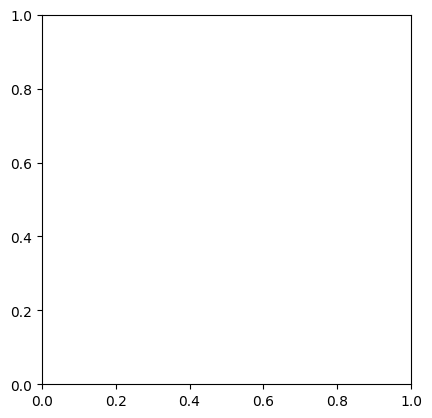

In [18]:
import matplotlib.pyplot as plt

print('Displaying images...')

plt.imshow(images_in[0], cmap='gray')
plt.show()

plt.imshow(images_ground_truth_in[0], cmap='gray')
plt.show()

SSIM: 0.9989319717331759


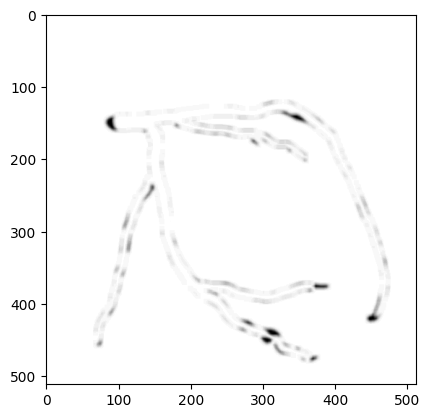

In [5]:
from skimage.metrics import structural_similarity as ssim
import cv2
import numpy as np

# Example usage
imageA = images_in[2]
imageB = images_ground_truth_in[2]
imageA[imageA > 0] = 1
imageB[imageB > 0] = 1
    
# Ensure the images are the same size
if imageA.shape != imageB.shape:
    raise ValueError("Input images must have the same dimensions.")

# Compute SSIM between two images
(score, diff) = ssim(imageA, imageB, full=True)
print(f"SSIM: {score}")

# Convert the diff image to uint8 format
diff = (diff * 255).astype("uint8")

# Display the difference image
plt.imshow(diff, cmap='gray')
plt.show()

In [77]:
# calculate only white pixel similarity
def pixel_similarity(imageA, imageB):
    """
    Calculate binary segmentation image to ground truth image similarity
    only for white pixels
    
    """
    # Ensure the images are the same size
    if imageA.shape != imageB.shape:
        raise ValueError("Input images must have the same dimensions.")
    # Compute SSIM between two images
    imageA_sum = np.sum(imageA)
    imageB_sum = np.sum(imageB)
    accuracy_white_as_white = np.sum(imageA[imageB == 1]) / imageB_sum
    accuracy_white_as_black = 1 - accuracy_white_as_white

    accuracy_white_left_as_white = np.sum(imageA[imageB == 1]) / imageA_sum
    accuracy_white_left_as_black = 1 - accuracy_white_left_as_white

    accuracy_white_to_white = imageA_sum / imageB_sum

    accuracy_white_as_white = 0 if np.isnan(accuracy_white_as_white) else accuracy_white_as_white
    accuracy_white_as_black = 0 if np.isnan(accuracy_white_as_black) else accuracy_white_as_black
    accuracy_white_left_as_white = 0 if np.isnan(accuracy_white_left_as_white) else accuracy_white_left_as_white
    accuracy_white_left_as_black = 0 if np.isnan(accuracy_white_left_as_black) else accuracy_white_left_as_black
    accuracy_white_to_white = 0 if np.isnan(accuracy_white_to_white) else accuracy_white_to_white
    accuracy_white_to_white = 0 if np.isinf(accuracy_white_to_white) else accuracy_white_to_white
    return accuracy_white_as_white, accuracy_white_as_black, accuracy_white_left_as_white, accuracy_white_left_as_black, accuracy_white_to_white

similarity_w_w, similarity_w_b, similarity_w_l_w, similarity_w_l_b, similarity_w_to_w = pixel_similarity(imageA[0], imageB[0])
print(f"White pixel on right similarity: {similarity_w_w}")
print(f"White pixel on right dissimilarity: {similarity_w_b}")

print(f"White pixel on left similarity: {similarity_w_l_w}")
print(f"White pixel on left dissimilarity: {similarity_w_l_b}")

print(f"White pixel on right to left similarity: {similarity_w_to_w}")

mean_similarity_w_w = 0
mean_similarity_w_b = 0
mean_similarity_w_l_w = 0
mean_similarity_w_l_b = 0
mean_similarity_w_to_w = 0
for i in range(len(images_in)):
    if images_in[i][1] != images_ground_truth_in[i][1]:
        print(f"Image name mismatch: {images_in[i][1]} != {images_ground_truth_in[i][1]}")
        continue
    imageA = images_in[i][0]
    imageB = images_ground_truth_in[i][0]
    imageA[imageA > 0] = 1
    imageB[imageB > 0] = 1
    similarity_w_w, similarity_w_b, similarity_w_l_w, similarity_w_l_b, similarity_w_to_w = pixel_similarity(imageA, imageB)

    mean_similarity_w_w += similarity_w_w
    mean_similarity_w_b += similarity_w_b
    mean_similarity_w_l_w += similarity_w_l_w
    mean_similarity_w_l_b += similarity_w_l_b
    mean_similarity_w_to_w += similarity_w_to_w
mean_similarity_w_w /= len(images_in)
mean_similarity_w_b /= len(images_in)
mean_similarity_w_l_w /= len(images_in)
mean_similarity_w_l_b /= len(images_in)
mean_similarity_w_to_w /= len(images_in)

print(f"Mean white pixel to right similarity: {mean_similarity_w_w}")
print(f"Mean white pixel to right dissimilarity: {mean_similarity_w_b}")

print(f"Mean white pixel to left similarity: {mean_similarity_w_l_w}")
print(f"Mean white pixel to left dissimilarity: {mean_similarity_w_l_b}")

print(f"Mean white pixel left to right similarity: {mean_similarity_w_to_w}")

/var/folders/j8/ycql35hs3415ybxz7vjtcrr40000gn/T/ipykernel_95999/1339117983.py:14: RuntimeWarning: invalid value encountered in scalar divide
  accuracy_white_as_white = np.sum(imageA[imageB == 1]) / imageB_sum
/var/folders/j8/ycql35hs3415ybxz7vjtcrr40000gn/T/ipykernel_95999/1339117983.py:17: RuntimeWarning: invalid value encountered in scalar divide
  accuracy_white_left_as_white = np.sum(imageA[imageB == 1]) / imageA_sum
/var/folders/j8/ycql35hs3415ybxz7vjtcrr40000gn/T/ipykernel_95999/1339117983.py:20: RuntimeWarning: invalid value encountered in scalar divide
  accuracy_white_to_white = imageA_sum / imageB_sum
/var/folders/j8/ycql35hs3415ybxz7vjtcrr40000gn/T/ipykernel_95999/1339117983.py:20: RuntimeWarning: divide by zero encountered in scalar divide
  accuracy_white_to_white = imageA_sum / imageB_sum


White pixel on right similarity: 0
White pixel on right dissimilarity: 0
White pixel on left similarity: 0
White pixel on left dissimilarity: 0
White pixel on right to left similarity: 0
Mean white pixel to right similarity: 0.8319485511947476
Mean white pixel to right dissimilarity: 0.16324952803694498
Mean white pixel to left similarity: 0.8491035604481357
Mean white pixel to left dissimilarity: 0.15089643955186466
Mean white pixel left to right similarity: 0.9994918438671127


In [76]:
def pixel_similarity(imageA, imageB):
    """
    Calculate binary segmentation image to ground truth image similarity
    only for white pixels
    """
    # Ensure the images are the same size
    if imageA.shape != imageB.shape:
        raise ValueError("Input images must have the same dimensions.")
    
    # Compute similarity for white pixels
    similarity = np.sum(imageA[imageB == 1]) / np.sum(imageB == 1)
    return similarity

sum_similarity = 0
n = len(images_in)
print(f"Number of images: {n}")
for i in range(n):
    if images_in[i][1] != images_ground_truth_in[i][1]:
        continue

    imageA = images_in[i][0]
    imageB = images_ground_truth_in[i][0]

    if np.sum(imageB) == 0:
        n -= 1
        continue

    similarity = pixel_similarity(imageA, imageB)
    sum_similarity += similarity
print(f"Number of images excluded due to no white pixels: {len(images_in) - n}")
print(f"Mean white pixel similarity: {sum_similarity / n}")

Number of images: 833
Number of images excluded due to no white pixels: 4
Mean white pixel similarity: 0.835962778221019
